# Konvolüsyon Nedir?

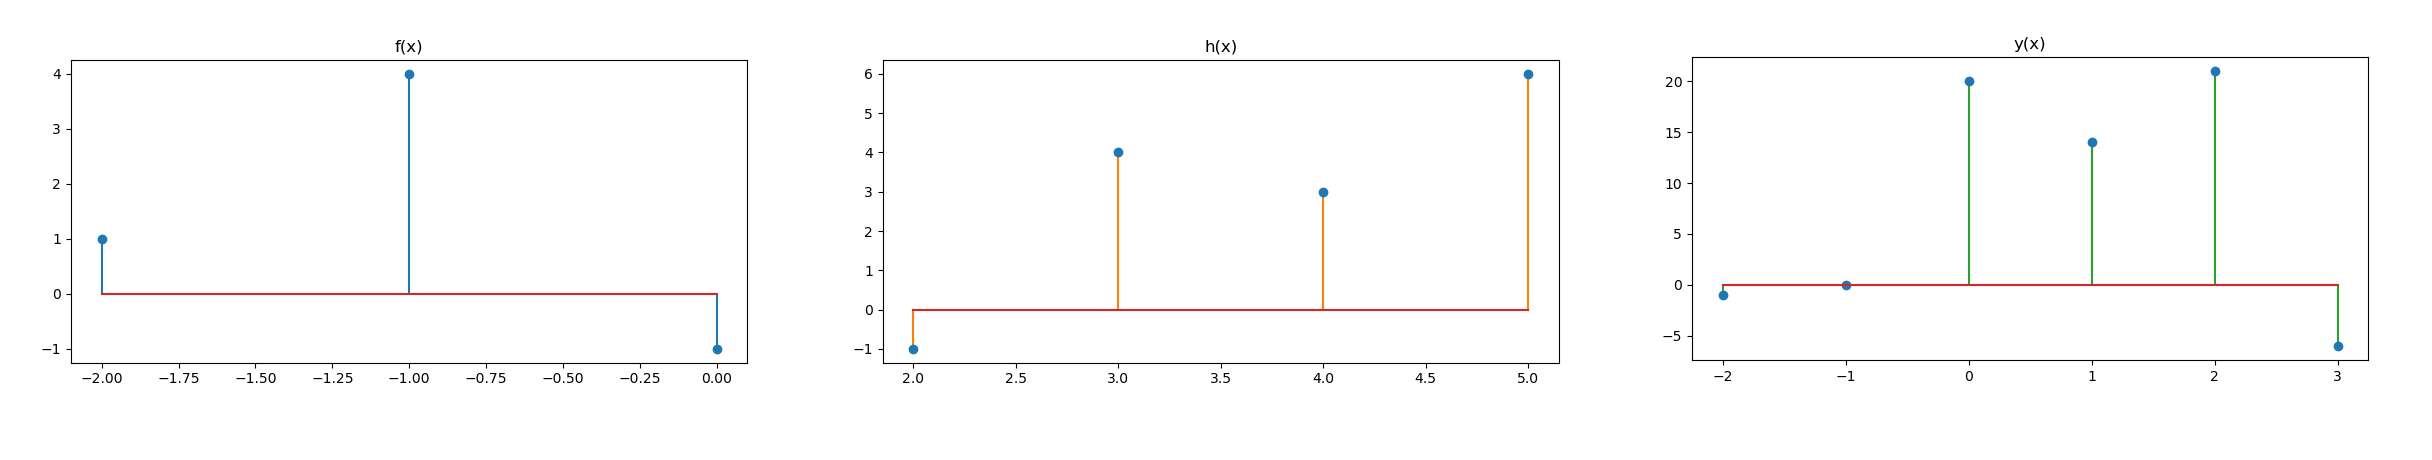

Konvolüsyon diğer bir adıyla evrişim 2 adet işaret (sinyal) arasında uygulanan bir matematiksel operatördür. Sürekli zamanda integral, ayrık zamanda toplam sembolüne denk gelir. Konvolüsyonun görüntü verilerinde uygulanma amacı görüntü verilerinden parametreler ile anlam çıkarırken görüntünün bütünlüğünü bozmadan köşeler, kenarlar, desenler ve renk geçişleri gibi pikselleri tekil incelediğimizde anlam kaybına yol açıcak methodların başarısızlığını önlemektir.

# Bir boyutta konvolüsyon

    Bir boyutta konvolüsyon uygulamanın pratik yöntemi için izlenecek adımlar:
    - İşaretlerden birini ters çevirmek
    - Eleman sayısı fazla olan işarete eleman sayısı az olan işaretin eleman sayısının bir eksiği kadar 0 elemanı   eklemek(padding)
    - İki işaretin ilk elemanlarını x ekseninde denk getirerek indizler bazında çarpmak
    - Çarpım sonuçlarını toplayarak yeni bir işaretin elemanını oluşturmak
    - İndisleri x ekseninde kaydırmak

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
lenx = int(input(" x sinyalinin uzunluğu : "))
lenh = int(input(" h sinyalinin uzunluğu : "))
index_x = int(input(" x sinyalinin indexi : "))
index_h = int(input(" h sinyalinin indexi : "))

 x sinyalinin uzunluğu : 4
 h sinyalinin uzunluğu : 3
 x sinyalinin indexi : -2
 h sinyalinin indexi : 2


In [10]:
def inputarray(uzunluk):
    array = []
    array = [int(input(f"sinyalin {i+1}. elemanı:  ")) for i in range(uzunluk)]
    return array

In [11]:
print("x sinyalini giriniz")
x= inputarray(lenx)
print("h sinyalini giriniz")
h = inputarray(lenh)

x sinyalini giriniz
sinyalin 1. elemanı:  -3
sinyalin 2. elemanı:  2
sinyalin 3. elemanı:  4
sinyalin 4. elemanı:  6
h sinyalini giriniz
sinyalin 1. elemanı:  2
sinyalin 2. elemanı:  -3
sinyalin 3. elemanı:  6


In [21]:
def padding_zero(array,padsize):
    for i in range(padsize):
        array.insert(i,0)
    for i in range(padsize):
        array.append(0)
        
    return array

In [ ]:
1,2,3,4,5 --> 5,4,3,2,1 
1,2,3,4,5,6 --> 6,5,4,3,2,1

In [15]:
def reverse(array):
    for i in range(int(len(array)/2)):
        temp = array[i]
        array[i] = array[len(array)-1-i]
        array[len(array)-1-i] = temp
    return array

In [23]:
def conv1d(x,h,lenx,lenh):
    conved = []
    lenconved = lenh + lenx -1
    if(lenx >= lenh):
        a = x[:]
        b = h[:]
        
        a= padding_zero(a,lenh-1)
        b = reverse(b)
        
    elif(lenh > lenx):
        a = h[:]
        b = x[:]
        
        a = padding_zero(a,lenx-1)
        b = reverse(b)
        
    for i in range(lenconved):
        sum = 0
        for j in range(len(b)):
            sum += a[j+i]*b[j]
            
        conved.append(sum)
        
    return conved

In [24]:
conved = conv1d(x,h,lenx,lenh)
conved_np = np.convolve(x,h)

In [27]:
t1 = np.arange(index_x,index_x+lenx,1)
t2 = np.arange(index_h,index_h+lenh,1)
t3 = np.arange(index_x,index_x+len(conved),1)

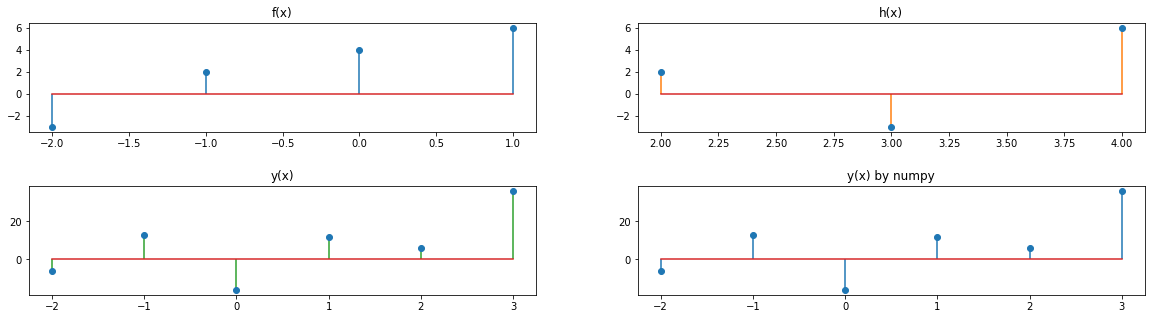

In [28]:
fig, ([ax1, ax2],[ax3,ax4]) = plt.subplots(2,2,figsize = (20,5))
plt.subplots_adjust( hspace=0.5)
ax1.stem(t1,x,'tab:blue')
ax1.set_title('f(x)')
ax2.stem(t2, h, 'tab:orange')
ax2.set_title('h(x)')
ax3.stem(t3, conved, 'tab:green')
ax3.set_title('y(x)')
ax4.stem(t3, conved_np)
ax4.set_title('y(x) by numpy')
plt.show()

# İki Boyutta Konvolüsyon

In [86]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [87]:
resim = Image.open("resimler/tacmahal.jpg")

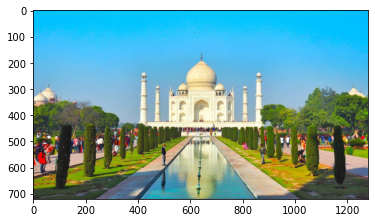

In [88]:
plt.imshow(resim)

In [91]:
resim = np.asarray(resim)

In [92]:
resim.shape

(720, 1280, 3)

In [93]:
resim = np.mean(resim,axis = 2)

In [94]:
resim.shape

(720, 1280)

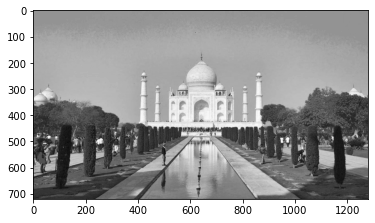

In [97]:
plt.imshow(resim,cmap = "gray")

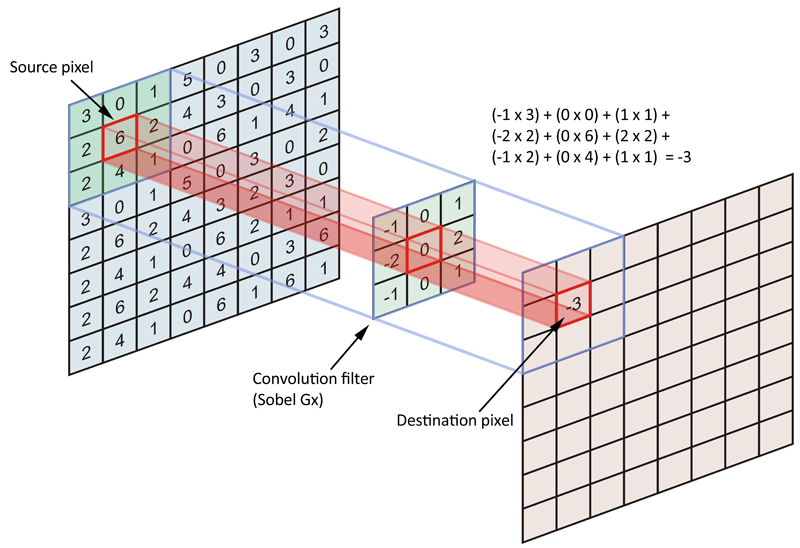

In [191]:
filtre = np.matrix([[0,0,0,0,0],
                   [0,2,0,-2,0],
                   [0,2,0,-2,0],
                   [0,2,0,-2,0],
                   [0,0,0,0,0]]
                  )

In [192]:
def padding_zero2d(resim,padsize):
    return np.pad(resim,(padsize,), mode = 'constant', constant_values= 0)

In [193]:
resim_padded = padding_zero2d(resim,2)

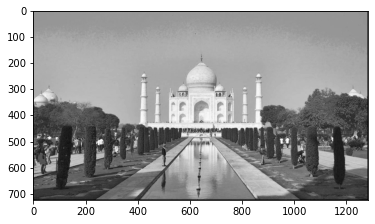

In [194]:
plt.imshow(resim_padded,cmap = "gray")

In [195]:
resim_filtreli = np.zeros_like(resim)

In [196]:
def conv2d(resim,padsize,stride,resim_filtreli):
    resim_pad = padding_zero2d(resim,padsize)
    for j in range(0,resim.shape[0],stride):
        for i in range(0,resim.shape[1],stride):
            resim_filtreli[j,i] = (np.multiply(filtre,resim_pad[j:j+filtre.shape[0],i : i+filtre.shape[1]])).sum()
    return resim_filtreli

In [197]:
filtrelenmis = conv2d(resim,2,1,resim_filtreli)

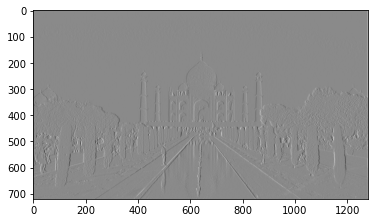

In [198]:
plt.imshow(filtrelenmis,cmap = "gray")

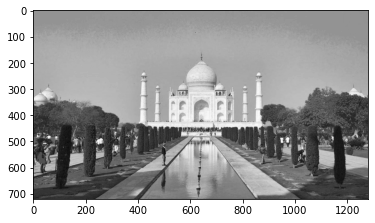

In [199]:
plt.imshow(resim,cmap = "gray")